# **Tugas Besar Pembelajaran Mesin: Task 1**

* Nama: Muhammad Tsaqif Ammar
* NIM: 1301194222
* Kelas: IF-43-06

### **Deskripsi Tugas**

Diberikan dataset pelanggan pada suatu dealer kendaraan, lakukan *clustering*. ***Clustering*** (*unsupervised learning*), pada konteks ini, adalah mengelompokkan pelanggan berdasarkan data pelanggan di dealer tanpa memperhatikan label kelas apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak.




### **Library yang Dibutuhkan**

* `pandas`: untuk pemrosesan dataset
* `numpy`: untuk pemrosesan data saat klustering
* `seaborn`, `matplotlib.pyplot`: untuk penggambaran chart/graf
* `math`: untuk memudahkan perhitungan saat kalkulasi jarak
* `random`: untuk membuat centroid awal dengan pengambilan acak

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random

### **Mengimport Data Kendaraan**

In [ ]:
data_train = pd.read_csv("https://github.com/tsaqifammar/k-means-clustering-kendaraan/blob/main/kendaraan_train.csv?raw=true")
data_test = pd.read_csv("https://github.com/tsaqifammar/k-means-clustering-kendaraan/blob/main/kendaraan_test.csv?raw=true")

data = pd.concat([data_train, data_test])

print(f"Banyak baris: {len(data)}\n")
data.head(5)

Banyak baris: 333470



,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2.0,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3.0,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4.0,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5.0,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


### **Eksplorasi dan Persiapan Data**

In [ ]:
# Mengecek banyak missing values pada tiap kolom
data.isnull().sum()

id                   47639
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
# Mengecek tipe data dari tiap kolom
data.dtypes

id                   float64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [ ]:
# Menghapus kolom tidak penting dan kolom dengan tipe data non-numerik
cols_to_drop = ["id", "Jenis_Kelamin", "SIM", "Kode_Daerah", "Sudah_Asuransi",
"Umur_Kendaraan", "Kendaraan_Rusak", "Tertarik"]
data = data.drop(cols_to_drop, axis=1)

data

,Umur,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,28029.0,152.0,97.0
1,48.0,25800.0,29.0,158.0
2,21.0,32733.0,160.0,119.0
3,58.0,2630.0,124.0,63.0
4,50.0,34857.0,88.0,194.0
...,...,...,...,...
47634,61.0,31039.0,124.0,67.0
47635,41.0,2630.0,157.0,232.0
47636,24.0,33101.0,152.0,211.0
47637,59.0,37788.0,26.0,239.0


In [ ]:
# Mengisi missing values dengan rata-rata kolom
data = data.fillna(data.mean())

In [ ]:
# Mengecek banyak missing values setelah missing values replacement
data.isnull().sum()

Umur                 0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

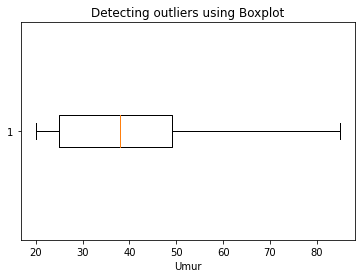

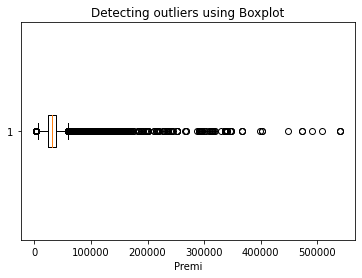

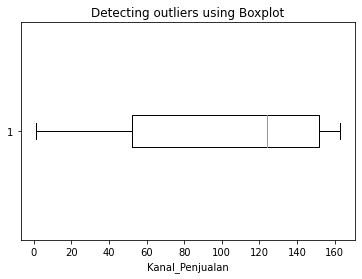

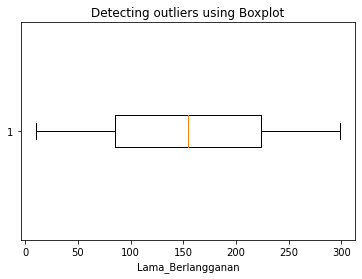

In [ ]:
# Melihat outlier
for feature in data.columns:
  plt.boxplot(data[feature], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(f"{feature}")
  plt.show()

Banyak baris: 256769



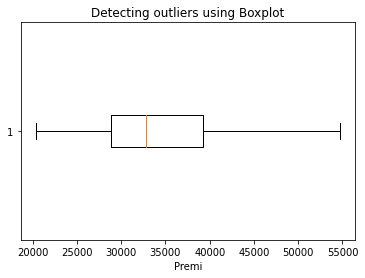

In [ ]:
# Menghilangkan outlier pada kolom Premi
min_threshold = data["Premi"].quantile(0.18)
max_threshold = data["Premi"].quantile(0.95)
data = data[ (min_threshold < data["Premi"]) & (data["Premi"] < max_threshold) ]
print(f"Banyak baris: {len(data)}\n")

plt.boxplot(data["Premi"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel("Premi")
plt.show()

In [ ]:
# Normalisasi data dengan min-max scaling
data = (data - data.min())/(data.max() - data.min())
data

,Umur,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.153846,0.223292,0.932099,0.301038
1,0.430769,0.158476,0.172840,0.512111
2,0.015385,0.360076,0.981481,0.377163
4,0.461538,0.421838,0.537037,0.636678
5,0.015385,0.069352,0.932099,0.557093
...,...,...,...,...
47632,0.107692,0.576708,0.932099,0.221453
47633,0.615385,0.889416,0.154321,0.480969
47634,0.630769,0.310817,0.759259,0.197232
47636,0.061538,0.370776,0.932099,0.695502


Text(0.5, 1.0, 'Correlation Heatmap')

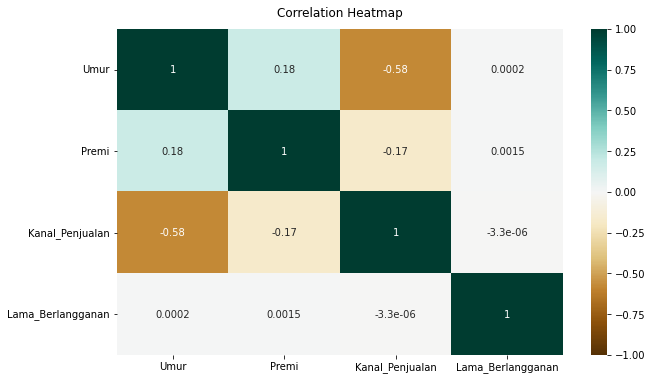

In [ ]:
# Melihat korelasi tiap pasangan kolom, untuk panduan Feature Selection
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
# Mengambil sample 50000 data saja
data = data.sample(n=50000)

print(f"Banyak baris: {len(data)}\n")

Banyak baris: 50000



In [ ]:
# Meng-export dataset hasil data preparation
data.to_csv('kendaraan_prepped.csv')

### **K-Means Clustering**

In [ ]:
def dist(p1, p2):
  # Perhitungan jarak dengan euclidean distance
  return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def k_means(points, k, max_iter, do_print=False):
  n = len(points)

  # Membuat sebanyak k centroid dengan mengambil k titik secara acak dari dataset
  centroids = [points[i] for i in random.sample(range(0, n), k)]

  # Membuat variabel clusters, dimana hasil klusterisasi akan disimpan
  clusters = None

  # Lakukan iterasi klusterisasi hingga kestabilan atau max_iter tercapai
  iter_cnt = 1
  while iter_cnt <= max_iter:
    # Membuat clusters = sebanyak k list kosong (masing-masing list = 1 kluster).
    clusters = [[] for _ in range(k)]
    
    # Loop untuk setiap titik, cari centroid terdekat.
    # Bila centroid ke-j yang paling dekat, maka masukkan titik tersebut ke clusters[j].
    for i in range(n):
      cur_closest = 0
      for j in range(k):
        if dist(points[i], centroids[j]) < dist(points[i], centroids[cur_closest]):
          cur_closest = j
      clusters[cur_closest].append(i)
    
    # Membuat centroids baru, dengan rata-rata dari titik-titik tiap kluster.
    nxt = [[] for _ in range(k)]
    for j in range(k):
      if len(clusters[j]) == 0:
        nxt[j] = centroids[j]
      else:
        nxt[j] = points[clusters[j]].mean(axis=0)

    # Cek jika kestabilan tercapai (jika centroid baru tidak berubah).
    if np.array_equal(nxt, centroids):
      break
    
    # Update centroid menjadi yang baru.
    centroids = nxt

    # Print informasi klusterisasi pada tiap iterasi nya.
    if do_print:
      print(f"-- Iterasi ke-{iter_cnt}: --")
      print(f"Posisi centroid: {centroids}")
      print(f"Banyak anggota cluster: {[len(clusters[i]) for i in range(k)]}")
    
    iter_cnt += 1
  return centroids, clusters


### **Program Utama**

In [ ]:
tmp = data[['Umur', 'Kanal_Penjualan']].to_numpy()
k = 4
max_iter = 100

centroids, clusters = k_means(tmp, k, max_iter, True)

-- Iterasi ke-1: --
Posisi centroid: [array([0.27068416, 0.15494063]), array([0.70138513, 0.30820308]), array([0.44181354, 0.15680764]), array([0.19033796, 0.87507451])]
Banyak anggota cluster: [4453, 6281, 3736, 35530]
-- Iterasi ke-2: --
Posisi centroid: [array([0.25897633, 0.15472269]), array([0.74534037, 0.39904577]), array([0.47369931, 0.15080565]), array([0.18623213, 0.8760859 ])]
Banyak anggota cluster: [3980, 4851, 5951, 35218]
-- Iterasi ke-3: --
Posisi centroid: [array([0.25966072, 0.15594858]), array([0.74291498, 0.53267002]), array([0.5076319 , 0.14936523]), array([0.17673108, 0.87837526])]
Banyak anggota cluster: [4005, 4408, 7131, 34456]
-- Iterasi ke-4: --
Posisi centroid: [array([0.27139607, 0.15598508]), array([0.66255842, 0.7479068 ]), array([0.57039944, 0.14963567]), array([0.16256917, 0.88198719])]
Banyak anggota cluster: [4481, 4148, 8175, 33196]
-- Iterasi ke-5: --
Posisi centroid: [array([0.3019805 , 0.15528254]), array([0.57267047, 0.77083452]), array([0.6082085

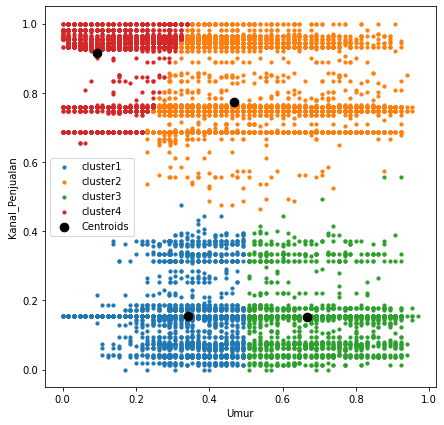

In [ ]:
# Visualisasi hasil klusterisasi dengan scatter plot
def visualize(points, centroids, clusters):
  labels = ["cluster1", "cluster2", "cluster3", "cluster4", "cluster5"]
  fig, ax = plt.subplots(figsize=(7,7))
  
  # Untuk setiap kluster, tambahkan titik-titik nya ke scatter plot
  for i in range(k):
    plt.scatter(points[clusters[i]][:,0], points[clusters[i]][:,1], label=labels[i], s=10)
  
  # Menambahkan centroid ke scatter plot
  xs = [c[0] for c in centroids]
  ys = [c[1] for c in centroids]
  plt.scatter(xs, ys, s=75, c="black", label="Centroids")
  
  # Menambah informasi seperti label tiap sumbu dan legend
  plt.xlabel("Umur")
  plt.ylabel("Kanal_Penjualan")
  plt.legend()
  plt.show()

visualize(tmp, centroids, clusters)

### **Evaluasi**

Berikut digunakan elbow-method untuk evaluasi k-Means.

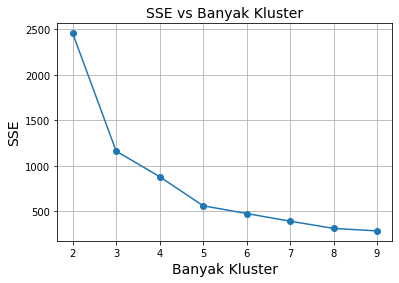

In [ ]:
def SSE(points, centroids, clusters):
  # Mengembalikan SSE yaitu Sum of Squared Errors
  sum = 0
  for i in range(len(centroids)):
    for idx in clusters[i]:
      sum += dist(points[idx], centroids[i])**2
  return sum

ks = range(2, 10)
SSEs = []

# Mengumpulkan nilai SSE untuk k-Means dengan k = 2,3,...,9
# Untuk masing-masing k, jalankan k-Means sebanyak 5x, dan
# ambil nilai SSE terendah
for i in ks:
  k_SSEs = []
  for j in range(5):
    ctr, clstr = k_means(tmp, i, max_iter)
    k_SSEs.append(SSE(tmp, ctr, clstr))
  SSEs.append(min(k_SSEs))

# Plot kan hasil berupa line chart
plt.plot(ks, SSEs, marker='o')
plt.title('SSE vs Banyak Kluster', fontsize=14)
plt.xlabel('Banyak Kluster', fontsize=14)
plt.ylabel('SSE', fontsize=14)
plt.grid(True)
plt.show()

### **Eksperimen**

Run K-Means Clustering berkali-kali dengan parameter yang sama, tetapi menunjukkan hasil yang berbeda. Ini menunjukkan algoritma K-Means Clustering sensitif terhadap $k$ centroid pertama yang dipilih secara acak.

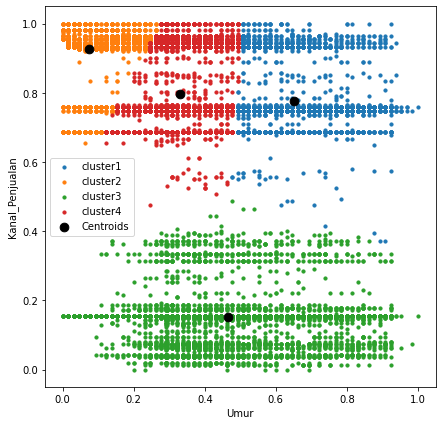

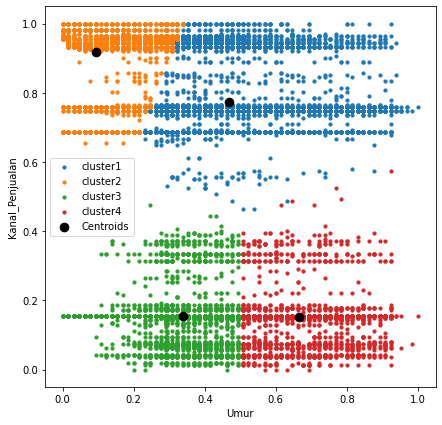

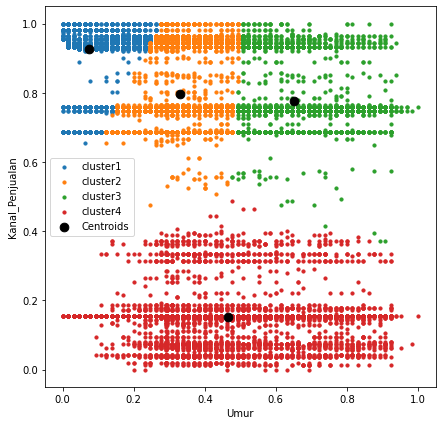

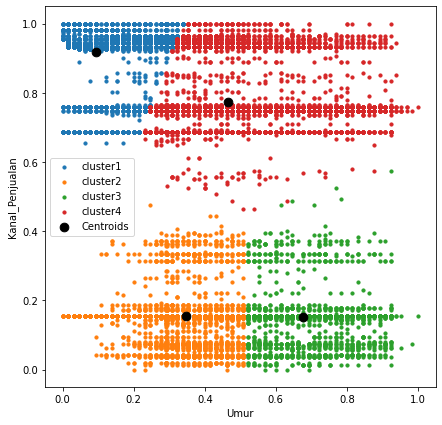

In [ ]:
for i in range(4):
  k = 4
  max_iter = 1000
  ctr, clstr = k_means(tmp, k, max_iter)
  visualize(tmp, ctr, clstr)